In [1]:
!pip install category_encoders
!pip install sklearn_evaluation

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import category_encoders as ce 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, precision_score, accuracy_score, plot_confusion_matrix, classification_report, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn_evaluation import plot

     |████████████████████████████████| 86 kB 4.2 MB/s 
     |████████████████████████████████| 45 kB 2.6 MB/s 
     |████████████████████████████████| 1.4 MB 31.3 MB/s 
     |████████████████████████████████| 96 kB 3.5 MB/s 
     |████████████████████████████████| 843 kB 16.1 MB/s 
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.1.2 which is incompatible.


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv("car_evaluation.csv",header=None)
data.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
# Changing column names for betterment
col_names = ['buying','maint','doors','persons','lug_boot','safety','class']
data.columns = col_names
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
encoder = ce.OrdinalEncoder(cols = ['buying','maint','doors','persons','lug_boot','safety','class'])
data = encoder.fit_transform(data)
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,1,1,1,1,1,1,1
1,1,1,1,1,1,2,1
2,1,1,1,1,1,3,1
3,1,1,1,1,2,1,1
4,1,1,1,1,2,2,1


In [5]:
x = data.drop(['class'], axis = 1)
y = data['class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
print("X_train: {}".format(x_train.shape))
print("X_test: {}".format(x_test.shape))
print("Y_train: {}".format(y_train.shape))
print("Y_test: {}".format(y_test.shape))

X_train: (1209, 6)
X_test: (519, 6)
Y_train: (1209,)
Y_test: (519,)


In [6]:
def evaluation_parametrics(y_train,yp_train,y_test,yp_test):
  print("--------------------------------------------------------------------------")
  print("Classification Report for Train Data")
  print(classification_report(y_train, yp_train))
  print("Classification Report for Test Data")
  print(classification_report(y_test, yp_test))
  print("--------------------------------------------------------------------------")
  accuracy = {
      'train': round(accuracy_score(y_train,yp_train),2),
      'test': round(accuracy_score(y_test,yp_test),2)
  }
  # Accuracy
  print("Accuracy on Train Data is: {}".format(accuracy['train']))
  print("Accuracy on Test Data is: {}".format(accuracy['test']))
  print("--------------------------------------------------------------------------")
  precision = {
      'train': round(precision_score(y_train,yp_train,average = "weighted"),2),
      'test': round(precision_score(y_test,yp_test,average = "weighted"),2)
  }
  # Precision
  print("Precision on Train Data is: {}".format(precision['train']))
  print("Precision on Test Data is: {}".format(precision['test']))
  print("--------------------------------------------------------------------------")
  recall = {
      'train': round(recall_score(y_train,yp_train,average = "weighted"),2),
      'test': round(recall_score(y_test,yp_test,average = "weighted"),2)
  }
  # Recall 
  print("Recall on Train Data is: {}".format(recall['train']))
  print("Recall on Test Data is: {}".format(recall['test']))
  print("--------------------------------------------------------------------------")
  f1 = {
      'train': round(f1_score(y_train,yp_train,average = "weighted"),2),
      'test': round(f1_score(y_test,yp_test,average = "weighted"),2)
  }
  # F1 Score
  print("F1 Score on Train Data is: {}".format(f1['train']))
  print("F1 Score on Test Data is: {}".format(f1['test']))
  return accuracy, precision, recall, f1

In [7]:
lr = LogisticRegression(max_iter = 1000,random_state = 48)
lr.fit(x_train,y_train)

yp_train = lr.predict(x_train)
yp_test = lr.predict(x_test)

lr_accuracy, lr_precision, lr_recall, lr_f1 = evaluation_parametrics(y_train,yp_train,y_test,yp_test)

--------------------------------------------------------------------------
Classification Report for Train Data
              precision    recall  f1-score   support

           1       0.88      0.93      0.90       852
           2       0.66      0.58      0.62       266
           3       0.79      0.63      0.70        41
           4       0.53      0.38      0.44        50

    accuracy                           0.82      1209
   macro avg       0.71      0.63      0.67      1209
weighted avg       0.81      0.82      0.82      1209

Classification Report for Test Data
              precision    recall  f1-score   support

           1       0.87      0.93      0.90       358
           2       0.66      0.58      0.62       118
           3       0.75      0.75      0.75        24
           4       0.55      0.32      0.40        19

    accuracy                           0.82       519
   macro avg       0.71      0.64      0.67       519
weighted avg       0.81      0.82    

In [8]:
rf = RandomForestClassifier(max_depth = 2,random_state = 48) # Keeping max_depth = 7 same as DT
rf.fit(x_train,y_train)

yp_train = rf.predict(x_train)
yp_test = rf.predict(x_test)

rf_accuracy, rf_precision, rf_recall, rf_f1 = evaluation_parametrics(y_train,yp_train,y_test,yp_test)

--------------------------------------------------------------------------
Classification Report for Train Data
              precision    recall  f1-score   support

           1       0.70      1.00      0.83       852
           2       0.00      0.00      0.00       266
           3       0.00      0.00      0.00        41
           4       0.00      0.00      0.00        50

    accuracy                           0.70      1209
   macro avg       0.18      0.25      0.21      1209
weighted avg       0.50      0.70      0.58      1209

Classification Report for Test Data
              precision    recall  f1-score   support

           1       0.69      1.00      0.82       358
           2       0.00      0.00      0.00       118
           3       0.00      0.00      0.00        24
           4       0.00      0.00      0.00        19

    accuracy                           0.69       519
   macro avg       0.17      0.25      0.20       519
weighted avg       0.48      0.69    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

In [9]:
param_grid = { 
    'n_estimators': [200, 400, 500, 700],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,9,10,14],
    'criterion' :['gini', 'entropy']
}
rfc=RandomForestClassifier(random_state=42)

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 14],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 400, 500, 700]})

In [15]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 14,
 'max_features': 'auto',
 'n_estimators': 200}

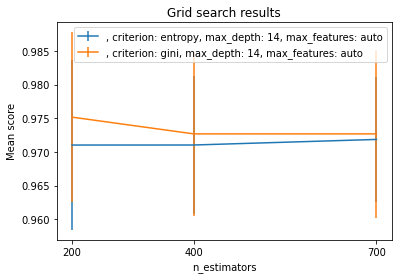

In [21]:
plot.grid_search(CV_rfc.cv_results_, change='n_estimators', subset={'max_depth': [14],
                        'n_estimators': [200,400, 700], 'max_features': 'auto'},kind='line')

In [17]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=14, criterion='gini')

rfc1.fit(x_train, y_train)

yp_train = rfc1.predict(x_train)
yp_test = rfc1.predict(x_test)

rf_accuracy, rf_precision, rf_recall, rf_f1 = evaluation_parametrics(y_train,yp_train,y_test,yp_test)

--------------------------------------------------------------------------
Classification Report for Train Data
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       852
           2       1.00      1.00      1.00       266
           3       1.00      1.00      1.00        41
           4       1.00      1.00      1.00        50

    accuracy                           1.00      1209
   macro avg       1.00      1.00      1.00      1209
weighted avg       1.00      1.00      1.00      1209

Classification Report for Test Data
              precision    recall  f1-score   support

           1       0.99      0.99      0.99       358
           2       0.92      0.91      0.91       118
           3       0.91      0.88      0.89        24
           4       0.73      0.84      0.78        19

    accuracy                           0.96       519
   macro avg       0.89      0.90      0.89       519
weighted avg       0.96      0.96    

In [12]:
df = pd.DataFrame([{
    'model': 'Logistic Regression(train)',
    'description': 'Hello',
    'accuracy': lr_accuracy['train'], 
    'precision': lr_precision['train'], 
    'recall': lr_recall['train'], 
    'f1': lr_f1['train'],
},{
    'model': 'Logistic Regression(test)',
    'description': 'Hello',
    'accuracy': lr_accuracy['test'], 
    'precision': lr_precision['test'], 
    'recall': lr_recall['test'], 
    'f1': lr_f1['test'],
},
 {
     'model': 'Random Forest(train)',
    'description': 'Number of trees = 100, max_depth = 2',
    'accuracy': rf_accuracy['train'], 
    'precision': rf_precision['train'], 
    'recall': rf_recall['train'], 
    'f1': rf_f1['train'],
 },
 {
     'model': 'Random Forest(test)',
    'description': 'Number of trees = 100, max_depth = 2',
    'accuracy': rf_accuracy['test'], 
    'precision': rf_precision['test'], 
    'recall': rf_recall['test'], 
    'f1': rf_f1['test'],
 }])
df

,model,description,accuracy,precision,recall,f1
0,Logistic Regression(train),Hello,0.82,0.81,0.82,0.82
1,Logistic Regression(test),Hello,0.82,0.81,0.82,0.81
2,Random Forest(train),"Number of trees = 100, max_depth = 2",1.00,1.00,1.00,1.00
3,Random Forest(test),"Number of trees = 100, max_depth = 2",0.96,0.96,0.96,0.96


In [27]:
rfc1.feature_importances_

array([0.15416266, 0.15537733, 0.06016747, 0.24055455, 0.09271346,
       0.29702453])

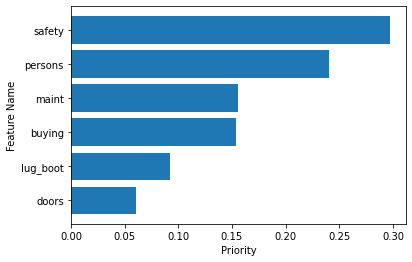

In [30]:
f_i = list(zip(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'],rfc1.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])
plt.xlabel('Priority')
plt.ylabel('Feature Name')
plt.show()